In [ ]:
# Import libraries
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import re

# API key, API secret, access token, access token secret
API_KEY = 'sau5wefTlt00B89Sc6T1Os4Gy'
API_SECRET = 'JSg6Yyjx2o0oWETuFOiLoIXF1FAbTOj7FmX6GTS3vvIiJZNczk'
ACCESS_TOKEN = '2605619839-gosJKVnMUIbZPCGoC6cAzkzvAgto0jmg2r0DExD'
ACCESS_TOKEN_SECRET = 'siIkXRXgFuN1yUditYIYaWkVy8saqsWiEuwp69TM8CG3v'

# Authentification
auth = tw.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# API
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Remove urls function
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
# Create custom search and define the number of tweets
search_custom = "#ai OR #artificialintelligence articial OR intelligence OR future -filter:retweets"

# Taking the tweets
raw_tweets = tw.Cursor(api.search,
                       q=search_custom,
                       since='2021-01-01').items(1000)

# Removing url on raw_tweets
raw_tweets_no_urls = [remove_url(raw_tweet.text) for raw_tweet in raw_tweets]
raw_tweets_no_urls[:10]

['The impact of Artificial Intelligence on the labour marketWhat do we know so far via',
 'AI in surgery series SurgJournalThe future of surgical microrobots includes drug delivery patching perforated',
 'Future of CyberSecurityInfographicv ingliguoriInfoSec MobileSecurity Tech Ransomware CyberSec',
 'Another breakthrough using AI to enhance diagnostics tests In this case artificialintelligence raised',
 'Artificial General Intelligence AGI is an attempt to create a tool set which is able to approach any problem much',
 'The use of AI in business processes is not restricted to B2C companies alone BernardMarr offers examples of how',
 'Several women will lead the 21st century in the field of Artificial Intelligence In the fields of entrepreneurship',
 'Forrester defines Business Process AI as any multistep operational process that uses two or more ML models or',
 'AoF 56 3 Clever Ways to use Storytelling in Data Science w Kirk Borne Analytics On fire podcast Analytics on Fi',
 '10 Artif

In [ ]:
# Create textblob object raw_tweets_no_urls also take total of polarity
sentiment_objects = [TextBlob(raw_tweets_no_url) for raw_tweets_no_url in raw_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.25,
 TextBlob("The impact of Artificial Intelligence on the labour marketWhat do we know so far via"))

In [ ]:
# Create a list that consist of polarity values and the tweets
sentiment_values = [[sentiment_object.sentiment.polarity, str(sentiment_object)]for sentiment_object in sentiment_objects]

sentiment_values[:10]

[[-0.25,
  'The impact of Artificial Intelligence on the labour marketWhat do we know so far via'],
 [0.0,
  'AI in surgery series SurgJournalThe future of surgical microrobots includes drug delivery patching perforated'],
 [0.0,
  'Future of CyberSecurityInfographicv ingliguoriInfoSec MobileSecurity Tech Ransomware CyberSec'],
 [0.0,
  'Another breakthrough using AI to enhance diagnostics tests In this case artificialintelligence raised'],
 [0.03750000000000002,
  'Artificial General Intelligence AGI is an attempt to create a tool set which is able to approach any problem much'],
 [0.1,
  'The use of AI in business processes is not restricted to B2C companies alone BernardMarr offers examples of how'],
 [-0.19999999999999998,
  'Several women will lead the 21st century in the field of Artificial Intelligence In the fields of entrepreneurship'],
 [0.5,
  'Forrester defines Business Process AI as any multistep operational process that uses two or more ML models or'],
 [0.166666666666666

In [ ]:
# Create dataframe from sentiment_values
sentiment_df = pd.DataFrame(sentiment_values, columns=['Polarity', 'Tweet'])

sentiment_df.head(10)

,Polarity,Tweet
0,-0.250000,The impact of Artificial Intelligence on the l...
1,0.000000,AI in surgery series SurgJournalThe future of ...
2,0.000000,Future of CyberSecurityInfographicv ingliguori...
3,0.000000,Another breakthrough using AI to enhance diagn...
4,0.037500,Artificial General Intelligence AGI is an atte...
5,0.100000,The use of AI in business processes is not res...
6,-0.200000,Several women will lead the 21st century in th...
7,0.500000,Forrester defines Business Process AI as any m...
8,0.166667,AoF 56 3 Clever Ways to use Storytelling in Da...
9,0.000000,10 ArtificialIntelligence Predictions for 2021...


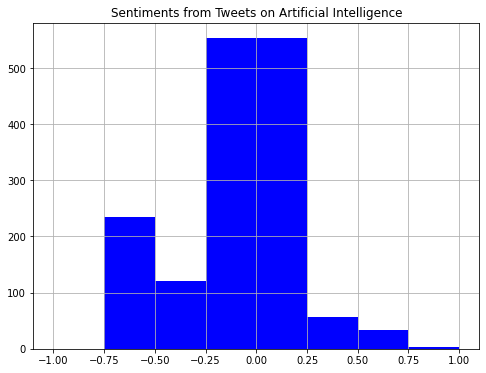

In [ ]:
# Plot histogram of the polarity values
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Artificial Intelligence")
plt.show()

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]

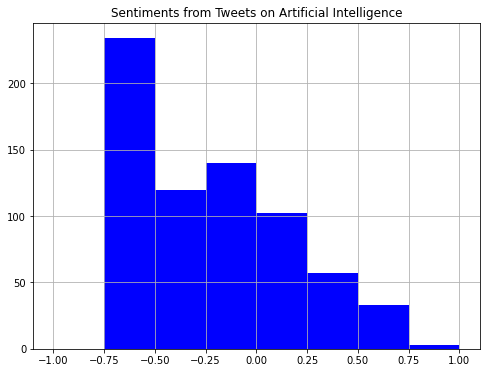

In [ ]:
# Plot histogram with break at zero
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Artificial Intelligence")
plt.show()

In [ ]:
# Get polarity values and get the sentiment from the tweets
total_polarity = 0
sentiment = ""

for tweet in sentiment_objects:
  total_polarity += tweet.polarity

total_polarity /= len(sentiment_objects)

if(total_polarity > 0):
  sentiment = "Positive"
else:
  sentiment = "Negative"

print("Polarity  : " + str(total_polarity))
print("Sentiment : " + sentiment)

Polarity  : -0.1439142270923513
Sentiment : Negative
